In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime as dt
from datetime import timedelta
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.svm import SVR

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
covid = pd.read_csv("covid_19_data.csv")
covid.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [5]:
print("Size/Shape of Data :" , covid.shape)
print("Check For Null Values:\n ", covid.isnull().sum())
print("Checking Data-Type: ", covid.dtypes) 

Size/Shape of Data : (13209, 8)
Check For Null Values:
  SNo                   0
ObservationDate       0
Province/State     6382
Country/Region        0
Last Update           0
Confirmed             0
Deaths                0
Recovered             0
dtype: int64
Checking Data-Type:  SNo                  int64
ObservationDate     object
Province/State      object
Country/Region      object
Last Update         object
Confirmed          float64
Deaths             float64
Recovered          float64
dtype: object


In [0]:
#droping the serial number column (SNO)
covid.drop(["SNo"] , 1, inplace = True)   # inplace is to make that drop is applied on dataset

In [7]:
covid.head()

,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [0]:
covid["ObservationDate"] = pd.to_datetime(covid["ObservationDate"])

In [0]:
#Grouping different types of cases as per the date
datewise = covid.groupby(["ObservationDate"]).agg({"Confirmed":'sum' , "Recovered":'sum' , "Deaths":'sum'})

In [10]:
print("Basic Information")
print("Total number of confirmed cases around the wrold", datewise["Confirmed"].iloc[-1])
print("Total number of recovered cases around the wrold", datewise["Recovered"].iloc[-1])
print("Total number of deaths cases around the wrold", datewise["Deaths"].iloc[-1])
print("Total number of Active cases around the wrold", datewise["Confirmed"].iloc[-1]-datewise["Recovered"].iloc[-1]-datewise["Deaths"].iloc[-1])
print("Total number of Closed cases around the wrold", datewise["Recovered"].iloc[-1]-datewise["Deaths"].iloc[-1])

Basic Information
Total number of confirmed cases around the wrold 1511104.0
Total number of recovered cases around the wrold 328661.0
Total number of deaths cases around the wrold 88338.0
Total number of Active cases around the wrold 1094105.0
Total number of Closed cases around the wrold 240323.0


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77]),
 <a list of 78 Text major ticklabel objects>)

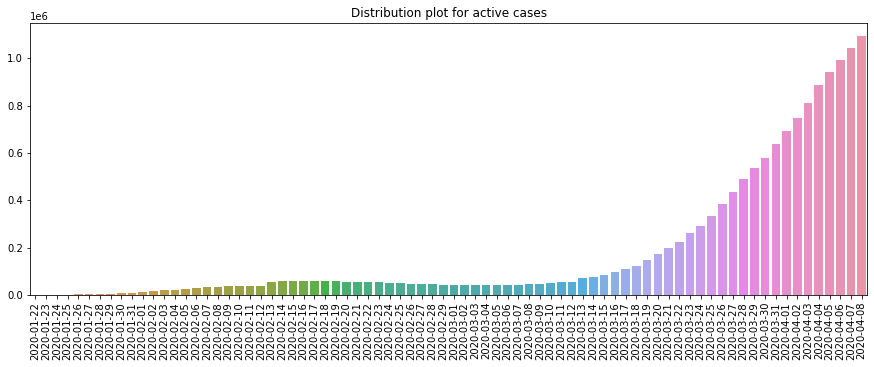

In [11]:
plt.figure(figsize=(15,5))
sns.barplot(x=datewise.index.date,y=datewise["Confirmed"]-datewise["Recovered"]-datewise["Deaths"])
plt.title("Distribution plot for active cases")
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77]),
 <a list of 78 Text major ticklabel objects>)

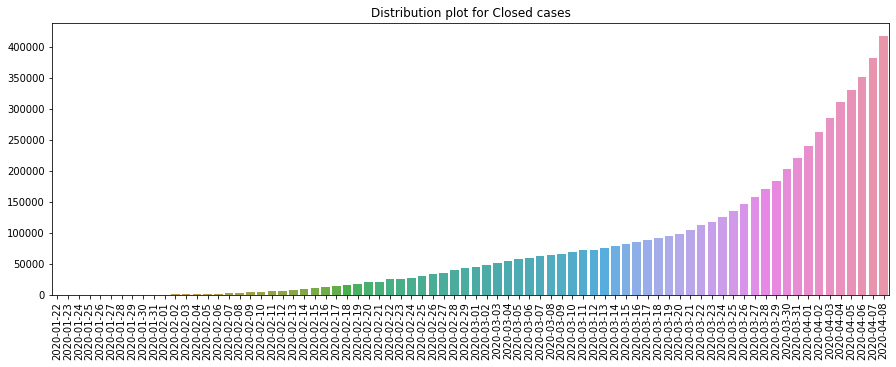

In [12]:
plt.figure(figsize=(15,5))
sns.barplot(x=datewise.index.date,y=datewise["Recovered"]+datewise["Deaths"])
plt.title("Distribution plot for Closed cases")
plt.xticks(rotation=90)

Text(0.5, 1.0, 'Weekly Progress of different Types of cases')

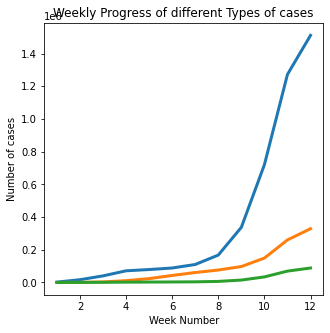

In [13]:
datewise["WeekofYear"] = datewise.index.weekofyear
week_num = []
weekwise_confirmed = []
weekwise_recovered = []
weekwise_deaths = []
w = 1
for i in list(datewise["WeekofYear"].unique()) :
    weekwise_confirmed.append(datewise[datewise["WeekofYear"]==i]["Confirmed"].iloc[-1])
    weekwise_recovered.append(datewise[datewise["WeekofYear"]==i]["Recovered"].iloc[-1])
    weekwise_deaths.append(datewise[datewise["WeekofYear"]==i]["Deaths"].iloc[-1])
    week_num.append(w)
    w = w+1
plt.figure(figsize = (5,5))
plt.plot(week_num , weekwise_confirmed , linewidth=3)
plt.plot(week_num , weekwise_recovered , linewidth=3 )
plt.plot(week_num , weekwise_deaths , linewidth=3 )
plt.xlabel("Week Number")
plt.ylabel("Number of cases")
plt.title("Weekly Progress of different Types of cases")

Average increase in number of Confirmed cases everyday 19366.0
Average increase in number of Recovered cases everyday 4213.0
Average increase in number of Deaths cases everyday 1132.0


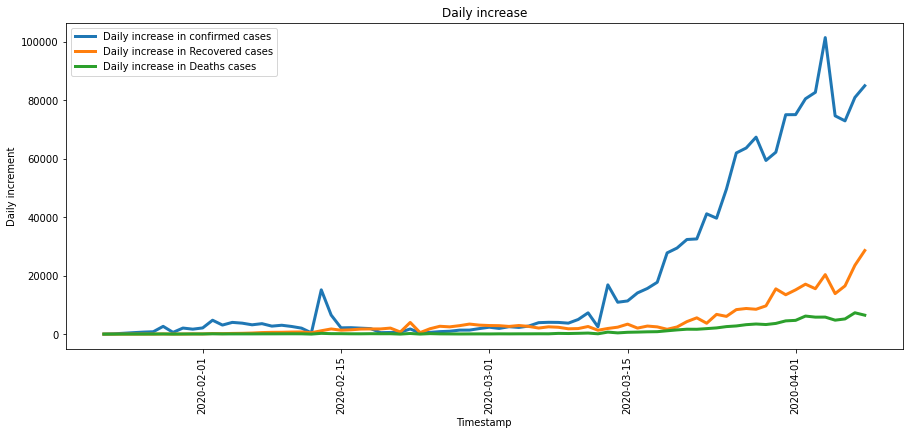

In [14]:
plt.figure(figsize= (15,6))
plt.plot(datewise["Confirmed"].diff().fillna(0), label = "Daily increase in confirmed cases", linewidth = 3)
plt.plot(datewise["Recovered"].diff().fillna(0), label = "Daily increase in Recovered cases", linewidth = 3)
plt.plot(datewise["Deaths"].diff().fillna(0), label = "Daily increase in Deaths cases", linewidth = 3)
plt.xlabel("Timestamp")
plt.ylabel("Daily increment")
plt.title("Daily increase")
plt.xticks(rotation=90)
plt.legend()

print("Average increase in number of Confirmed cases everyday" , np.round(datewise["Confirmed"].diff().fillna(0).mean()))
print("Average increase in number of Recovered cases everyday" , np.round(datewise["Recovered"].diff().fillna(0).mean()))
print("Average increase in number of Deaths cases everyday" , np.round(datewise["Deaths"].diff().fillna(0).mean()))


In [0]:
#Calculating Country wise Mortality Rate
countrywise=covid[covid["ObservationDate"]==covid["ObservationDate"].max()].groupby(["Country/Region"]).agg({"Confirmed":"sum","Recovered":"sum","Deaths":"sum"}).sort_values(["Confirmed"],ascending =False)
countrywise["Mortality"]=(countrywise["Deaths"]/countrywise["Confirmed"])*100
countrywise["Recovery"]=(countrywise["Recovered"]/countrywise["Confirmed"])*100



Text(0.5, 1.0, 'Top 15 countries as per number of dearths cases')

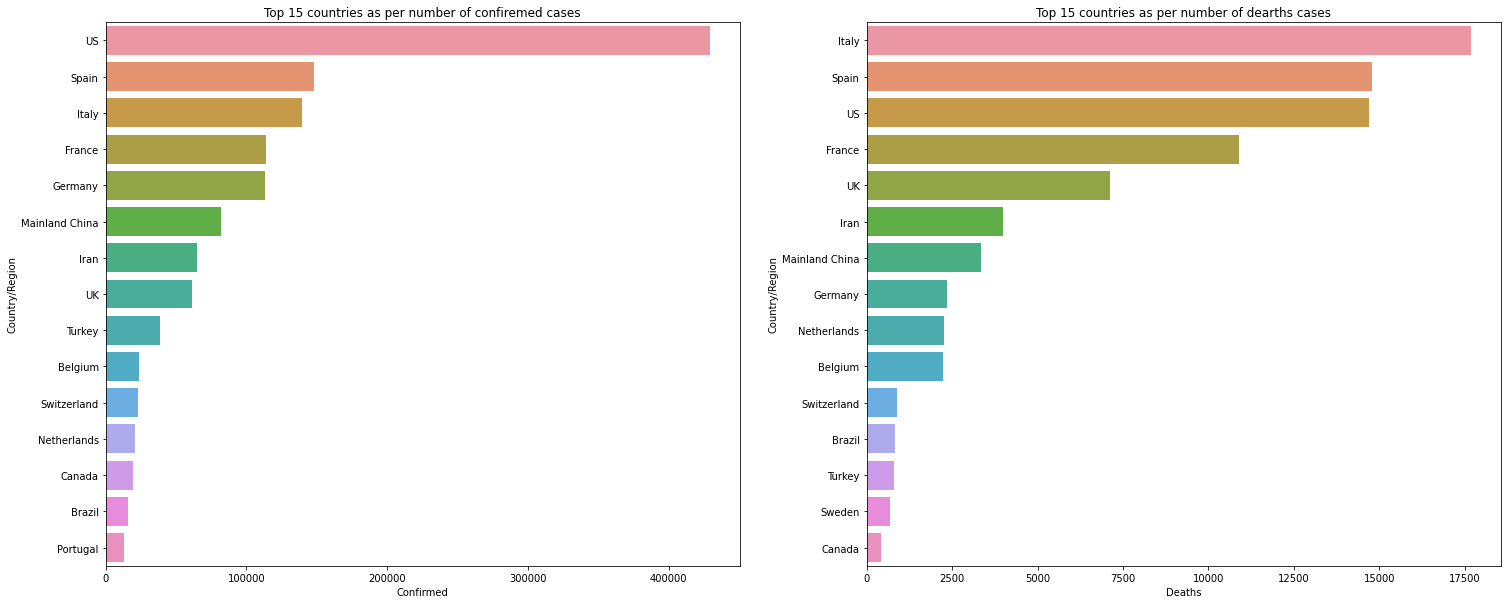

In [16]:
fig,(ax1,ax2) = plt.subplots(1,2 ,figsize = (25,10))
top_15confirmed = countrywise.sort_values(["Confirmed"],ascending = False ).head(15)
top_15deaths = countrywise.sort_values(["Deaths"],ascending = False ).head(15)
sns.barplot(x=top_15confirmed["Confirmed"] , y=top_15confirmed.index, ax=ax1)
ax1.set_title("Top 15 countries as per number of confiremed cases")
sns.barplot(x=top_15deaths["Deaths"] , y=top_15deaths.index, ax=ax2)
ax2.set_title("Top 15 countries as per number of dearths cases")

In [19]:
#Data analysis for India
india_data = covid[covid["Country/Region"] == "India"]
datewise_india = india_data.groupby(["ObservationDate"]).agg({"Confirmed":"sum","Recovered":"sum","Deaths":"sum"})
print(datewise_india.iloc[-1])
print("Total Active cases:", datewise_india["Confirmed"].iloc[-1]-datewise_india["Recovered"].iloc[-1]-datewise_india["Deaths"].iloc[-1])
print("Total closed cases: ", datewise_india["Recovered"].iloc[-1]+datewise_india["Deaths"].iloc[-1])

Confirmed    5916.0
Recovered     506.0
Deaths        178.0
Name: 2020-04-08 00:00:00, dtype: float64
Total Active cases: 5232.0
Total closed cases:  684.0


Text(0.5, 1.0, 'Weekly Progress of different Types of cases in India')

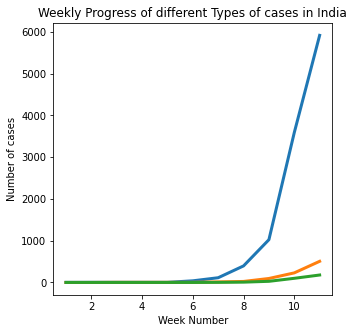

In [22]:
datewise_india["WeekofYear"] = datewise_india.index.weekofyear
week_num_india = []
india_weekwise_confirmed = []
india_weekwise_recovered = []
india_weekwise_deaths = []
w = 1
for i in list(datewise_india["WeekofYear"].unique()) :
    india_weekwise_confirmed.append(datewise_india[datewise_india["WeekofYear"]==i]["Confirmed"].iloc[-1])
    india_weekwise_recovered.append(datewise_india[datewise_india["WeekofYear"]==i]["Recovered"].iloc[-1])
    india_weekwise_deaths.append(datewise_india[datewise_india["WeekofYear"]==i]["Deaths"].iloc[-1])
    week_num_india.append(w)
    w = w+1
plt.figure(figsize = (5,5))
plt.plot(week_num_india , india_weekwise_confirmed , linewidth=3)
plt.plot(week_num_india , india_weekwise_recovered , linewidth=3 )
plt.plot(week_num_india , india_weekwise_deaths , linewidth=3 )
plt.xlabel("Week Number")
plt.ylabel("Number of cases")
plt.title("Weekly Progress of different Types of cases in India")

In [26]:
max_ind = datewise_india["Confirmed"].max()
china_data = covid[covid["Country/Region"]=="Mainland China"]
Italy_data = covid[covid["Country/Region"]=="Italy"]
US_data = covid[covid["Country/Region"]=="US"]
Spain_data = covid[covid["Country/Region"]=="Spain"]
datewise_China = china_data.groupby(["ObservationDate"]).agg({"Confirmed":"sum","Recovered":"sum","Deaths":"sum"})
datewise_Italy = Italy_data.groupby(["ObservationDate"]).agg({"Confirmed":"sum","Recovered":"sum","Deaths":"sum"})
datewise_US= US_data.groupby(["ObservationDate"]).agg({"Confirmed":"sum","Recovered":"sum","Deaths":"sum"})
datewise_Spain = Spain_data.groupby(["ObservationDate"]).agg({"Confirmed":"sum","Recovered":"sum","Deaths":"sum"})
print("It took", datewise_india[datewise_india["Confirmed"]>0].shape[0],"days in India to reach ", max_ind , "Confirmed Cases")
print("It took",datewise_Italy[(datewise_Italy["Confirmed"]>0)&(datewise_Italy["Confirmed"]<=max_ind)].shape[0],"days in Italy to reach number of Confirmed cases to India")
print("It took",datewise_US[(datewise_US["Confirmed"]>0)&(datewise_US["Confirmed"]<=max_ind)].shape[0],"days in US to reach number of Confirmed cases to India")
print("It took",datewise_China[(datewise_China["Confirmed"]>0)&(datewise_China["Confirmed"]<=max_ind)].shape[0],"days in China to reach number of Confirmed cases to India")
print("It took",datewise_Spain[(datewise_Spain["Confirmed"]>0)&(datewise_Spain["Confirmed"]<=max_ind)].shape[0],"days in Spain to reach number of Confirmed cases to India")



It took 70 days in India to reach  5916.0 Confirmed Cases
It took 37 days in Italy to reach number of Confirmed cases to India
It took 55 days in US to reach number of Confirmed cases to India
It took 7 days in China to reach number of Confirmed cases to India
It took 42 days in Spain to reach number of Confirmed cases to India


In [0]:
datewise["Days Since"] = datewise.index-datewise.index[0]
datewise["Days Since"] = datewise["Days Since"].dt.days
train_ml = datewise.iloc[:int(datewise.shape[0]*0.90)]
valid_ml = datewise.iloc[int(datewise.shape[0]*0.90):]
model_scores = []

In [28]:
lin_reg = LinearRegression(normalize = True)
svm = SVR(C=1, degree=6, kernel="poly" , epsilon=0.01)
lin_reg.fit(np.array(train_ml["Days Since"]).reshape(-1,1),np.array(train_ml["Confirmed"]).reshape(-1,1))
svm.fit(np.array(train_ml["Days Since"]).reshape(-1,1),np.array(train_ml["Confirmed"]).reshape(-1,1))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1, cache_size=200, coef0=0.0, degree=6, epsilon=0.01, gamma='scale',
    kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [0]:
prediction_valid_lin_reg = lin_reg.predict(np.array(valid_ml["Days Since"]).reshape(-1,1))
prediction_valid_svm = svm.predict(np.array(valid_ml["Days Since"]).reshape(-1,1))


In [30]:
new_date = []
new_prediction_lr = []
new_prediction_svm = []
for i in range(1,18):
    new_date.append(datewise.index[-1]+timedelta(days=i))
    new_prediction_lr.append(lin_reg.predict(np.array(datewise["Days Since"].max()+i).reshape(-1,1))[0][0])
    new_prediction_svm.append(svm.predict(np.array(datewise["Days Since"].max()+i).reshape(-1,1))[0])
pd.set_option("display.float_format",lambda x:'%.f' %x)
model_predictions = pd.DataFrame(zip(new_date,new_prediction_lr,new_prediction_svm),columns = ["Dates","LINEAR REGRSN","SVM PREDICTION"])
model_predictions.head(10)


,Dates,LINEAR REGRSN,SVM PREDICTION
0,2020-04-09,481900,1651382
1,2020-04-10,489496,1779618
2,2020-04-11,497091,1916232
3,2020-04-12,504686,2061657
4,2020-04-13,512282,2216342
5,2020-04-14,519877,2380751
6,2020-04-15,527472,2555369
7,2020-04-16,535068,2740696
8,2020-04-17,542663,2937251
9,2020-04-18,550258,3145571
